# T09 - Resampling

Gonzalo Cano Padilla

---

### Ejercicio 1
**Using basic statistical properties of the variance, as well as single- variable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1− α)Y ).**

Al derivar la ecuación usando las propiedades que nos pide el ejercicio, llegamos a la misma ecuación inicial, por lo cual esa alpha es la que minimiza la varianza de la combinación lineal


---
### Ejercicio 2
**a) Probabilidad de que la primera observación bootstrap no sea la j-ésima:**

Cada extracción del bootsrap escoge una de las n observaciones con una probabilidad uniforme entonces la probabilidad de que si sea es de 1/n, entonces la probabilidad de que no sea es 1-1/n

**b) Probabilidad de que la segunda observación no dea la j-ésima**

Cada extracción es independiente y con remplazo, entonces seria la misma distribución que la primera, 1 - 1/n

**c) Probabilidad de que la observación j-ésima no aparezca en ninguna de las n extracciones**

Para que no aparezca la observación j-ésima ninguna de las n extracciones deberia de escogerla, entonces la probabilidad de que no sea la j-ésima es de 1 - 1/n y como las n extraciones son independientes, la probabilidad de que no aparezca es de (1 - 1/n)^2

**d) Cuando n=5 la probabilidad de que j-ésima observación si este en la muestra**


In [1]:
p_j_no_este = (1-1/5)**5
print(f"Probabilidad de que j no este = {p_j_no_este:.4%}")
p_j_este = 1-p_j_no_este
print(f"Probabilidad de que j este = {p_j_este:.4%}")

Probabilidad de que j no este = 32.7680%
Probabilidad de que j este = 67.2320%


**e) Cuando n=100 la probabilidad de que j-ésima observación si este en la muestra**

In [2]:
p_j_no_este = (1-1/100)**100
print(f"Probabilidad de que j no este = {p_j_no_este:.4%}")
p_j_este = 1-p_j_no_este
print(f"Probabilidad de que j este = {p_j_este:.4%}")

Probabilidad de que j no este = 36.6032%
Probabilidad de que j este = 63.3968%


**f) Cuando n=10000 la probabilidad de que j-ésima observación si este en la muestra**

In [3]:
p_j_no_este = (1-1/10000)**10000
print(f"Probabilidad de que j no este = {p_j_no_este:.4%}")
p_j_este = 1-p_j_no_este
print(f"Probabilidad de que j este = {p_j_este:.4%}")

Probabilidad de que j no este = 36.7861%
Probabilidad de que j este = 63.2139%


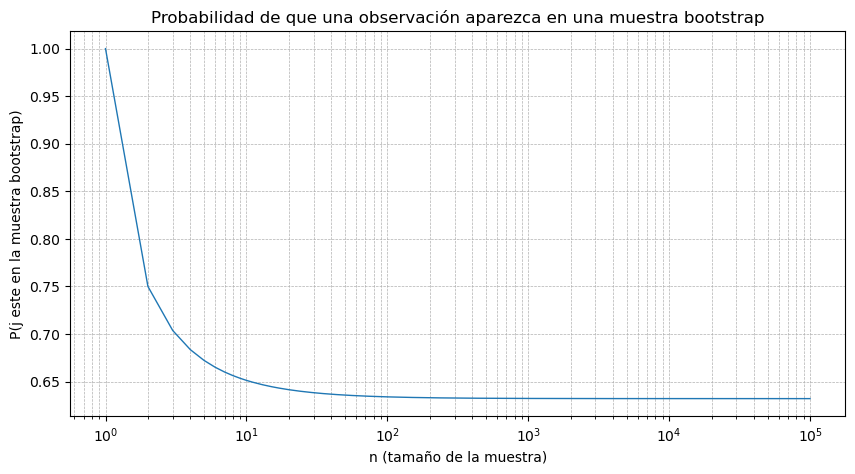

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.arange(1, 100001)

p_values = 1 - (1 - 1/n_values)**n_values

plt.figure(figsize=(10, 5))
plt.plot(n_values, p_values, linewidth=1)

plt.xscale('log')
plt.xlabel('n (tamaño de la muestra)')
plt.ylabel('P(j este en la muestra bootstrap)')
plt.title('Probabilidad de que una observación aparezca en una muestra bootstrap')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

**h) Simulación para n=100, j=4**

Obtuvimos el mismo resultado que en los incisos anteriores, pero tuve que ponerle size=100 al código que venia en el libro para que me diera el mismo resultado

In [5]:
rng = np.random.default_rng(10)
store = np.empty(10000)

for i in range(10000):
    sample = rng.choice(100, size=100, replace=True)
    store[i] = np.sum(sample == 4) > 0

prob_estimada = np.mean(store)
print(prob_estimada)

0.6362


---

### Ejercicio 3

**a) ¿Qué es lo que hace un k-fold**
* Divide los datos en un conjunto de n observaciones
* luego los divide en fold aleatorios
* Luego se hacen iteraciones sobre cada fold
* toma un fold como test y los otros k-1 folds los usa como train
* ajusta el modelo y calcula el error de predicción y finalmente se promedia el error

**b) Ventajas y desventajas**

Frente a validation set
* La unica desventaja que le pudiera encontrar es que tiene mucho costo computacional
* Ventajas: tiene menor varianza en la estimación del error, aprovecha mejor los datos ya que usa casi todos los datos

Frente a LOOCV
* Menor costo computacional
* Menos varianza
* Pero tiene más sesgo

---

### Ejercicio 4

Para estimar la desviación estándar de una predicción obtenida a partir de un método de aprendizaje estadístico, podemos usar el procedimiento bootstrap. Repetimos el proceso de obtener muestras bootstrap, ajustamos el modelo en cada muestra, realizamos la predicción para el punto de interés y calculamos la desviación estándar de las predicciones resultantes.

---

### Ejercicio 5

Estimar el test error de la regresión logística usando validation set aproach

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('Default.csv')
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


In [7]:
# a) regresión logística con balance e income
y = (df['default']=='Yes').astype(int)
X = df.drop(columns=['default','student'])

log_reg = LogisticRegression(max_iter=1000).fit(X, y)
print("Intercept:", log_reg.intercept_)
print("Coeficientes:", log_reg.coef_)

Intercept: [-11.54046792]
Coeficientes: [[5.64710265e-03 2.08089741e-05]]


In [8]:
# b) Estimar el error del modelo con train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_proba = log_reg.predict_proba(X_test)[:,1]
y_pred = (y_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
test_error = 1-accuracy

print('Accuracy en validation set:', accuracy)
print('test_error:', test_error)

Accuracy en validation set: 0.97275
test_error: 0.027249999999999996


In [9]:
# c) repetir el proceso b con diferentes splits
test_errors = []

for n in [1,2,3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=n)

    log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_proba = log_reg.predict_proba(X_test)[:,1]
    y_pred = (y_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1-accuracy
    test_errors.append(test_error)
    print(f'Split {n} -> Test error: {test_error}')

errores_promedio = np.mean(test_errors)
print(f'Errores promedio: {errores_promedio}')

Split 1 -> Test error: 0.025249999999999995
Split 2 -> Test error: 0.024499999999999966
Split 3 -> Test error: 0.025000000000000022
Errores promedio: 0.02491666666666666


In [10]:
# d) agregando la variable student como dummy
student = (df['student']=='Yes').astype(int)
X = np.column_stack([df['income'],df['balance'],student])

test_errors2 = []
for n in [1,2,3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=n)

    log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_proba = log_reg.predict_proba(X_test)[:,1]
    y_pred = (y_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1-accuracy
    test_errors2.append(test_error)
    print(f'Split {n} -> Test error: {test_error}')

errores_promedio = np.mean(test_errors2)
print(f'Errores promedio: {errores_promedio}')

Split 1 -> Test error: 0.025249999999999995
Split 2 -> Test error: 0.02475000000000005
Split 3 -> Test error: 0.02475000000000005
Errores promedio: 0.024916666666666698


La regresión logística usando únicamente balance e income muestra un desempeño muy sólido para predecir el default. El predictor dominante es balance, mientras que income tiene un efecto marginal.
Al evaluar el modelo mediante el validation set approach, se obtiene un error de clasificación cercano a 2.5%, y al repetir el proceso con distintas particiones los resultados permanecen muy estables, lo cual indica que el modelo es robusto y no depende de un split particular.

Finalmente, al incorporar la variable student como un predictor adicional, el test error promedio no mejora, lo que sugiere que ser estudiante no añade información relevante más allá de la que ya proporcionan balance e income. Por lo tanto, el modelo más simple usando solo balance e income— es suficiente y tan efectivo como el modelo extendido.

---

### Ejercicio 6

Estimar el error estandarr de la regresión logística usando income y balance con diferentes metodos

In [14]:
!pip install ISLP


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [18]:
# a) Usando las funciones del libro
import statsmodels.api as sm
from ISLP.models import summarize

df = pd.read_csv("Default.csv")

y = (df['default'] == 'Yes').astype(int)
X = df[['income', 'balance']]
X = sm.add_constant(X)

glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_fit = glm_model.fit()

summarize(glm_fit)


,coef,std err,z,P>|z|
const,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


In [19]:
# b) función del bootstrap
def boot_fn(data, index):
    df_boot = data.iloc[index]

    y_boot = (df_boot['default'] == 'Yes').astype(int)
    X_boot = df_boot[['income', 'balance']]
    X_boot = sm.add_constant(X_boot)

    model_boot = sm.GLM(y_boot, X_boot, family=sm.families.Binomial())
    result_boot = model_boot.fit()

    return result_boot.params[['income', 'balance']]

# Prueba de la función
rng = np.random.default_rng(1)
n = df.shape[0]
idx = rng.choice(n, size=n, replace=True)

print(boot_fn(df, idx))

income     0.000018
balance    0.005789
dtype: float64


In [20]:
B = 1000
boot_coefs = np.zeros((B, 2))

rng = np.random.default_rng(123)
n = df.shape[0]

for b in range(B):
    idx = rng.choice(n, size=n, replace=True)
    coefs = boot_fn(df, idx)

    boot_coefs[b, 0] = coefs['income']
    boot_coefs[b, 1] = coefs['balance']

se_income_boot = boot_coefs[:, 0].std(ddof=1)
se_balance_boot = boot_coefs[:, 1].std(ddof=1)

print("Bootstrap standard errors:")
print("SE_boot(income)  =", se_income_boot)
print("SE_boot(balance) =", se_balance_boot)

Bootstrap standard errors (B = 1000):
SE_boot(income)  = 4.763891922335394e-06
SE_boot(balance) = 0.00023378402616357837


Los errores estándar obtenidos mediante sm.GLM() y mediante el método bootstrap son muy parecidos, lo que indica que el modelo logístico se ajusta bien a los datos y que las suposiciones teóricas necesarias para el cálculo analítico de los SE son razonablemente válidas en este caso.
El bootstrap es ligeramente mayor para balance, lo cual sugiere que puede capturar un poco más de variabilidad muestral, pero en general ambos métodos coinciden en magnitud y confirman que balance es un predictor altamente significativo mientras que el efecto de income es pequeño pero estable.

---

### Ejercicio 7

In [22]:
from ISLP import load_data

Weekly = load_data('Weekly')

y = (Weekly['Direction'] == 'Up').astype(int)

X = Weekly[['Lag1', 'Lag2']]
X = sm.add_constant(X)

glm_weekly = sm.GLM(y, X, family=sm.families.Binomial())
glm_weekly_fit = glm_weekly.fit()

glm_weekly_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Fri, 28 Nov 2025   Deviance:                       1488.2
Time:                        13:10:51   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

In [24]:
# b) quitando la primera observación
Weekly = load_data('Weekly')

Weekly_train = Weekly.iloc[1:]

y_train = (Weekly_train['Direction'] == 'Up').astype(int)

X_train = Weekly_train[['Lag1', 'Lag2']]
X_train = sm.add_constant(X_train)

glm_weekly_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_weekly_train_fit = glm_weekly_train.fit()

glm_weekly_train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.26
Date:                Fri, 28 Nov 2025   Deviance:                       1486.5
Time:                        13:23:39   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007373
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

In [25]:
#c) predecir la dirección de la primera observación

first_obs = Weekly.iloc[0]
X_first = pd.DataFrame({
    'const': 1,
    'Lag1': [first_obs['Lag1']],
    'Lag2': [first_obs['Lag2']]
})

p_first = glm_weekly_train_fit.predict(X_first)[0]

pred_class = int(p_first > 0.5)

print("Probabilidad predicha de 'Up':", p_first)
print("Predicción de la dirección:", "Up" if pred_class == 1 else "Down")
print("Dirección real:", first_obs['Direction'])

Probabilidad predicha de 'Up': 0.5713923205204429
Predicción de la dirección: Up
Dirección real: Down


In [32]:
# d) ciclo LOOCV
y = np.where(Weekly['Direction'] == 'Up', 1, 0)
X = Weekly[['Lag1', 'Lag2']].to_numpy()
X_const = sm.add_constant(X)

n = X_const.shape[0]
errors = np.zeros(n)

for i in range(n):
    mask = np.ones(n, dtype=bool)
    mask[i] = False

    X_train = X_const[mask]
    y_train = y[mask]

    model_i = sm.GLM(y_train, X_train, family=sm.families.Binomial())
    fit_i = model_i.fit()

    X_test = X_const[i:i+1, :]
    p_i = fit_i.predict(X_test)[0]

    y_pred_i = int(p_i > 0.5)
    errors[i] = int(y_pred_i != y[i])

print("Primeros 10 errores (0 = bien, 1 = mal):")
print(errors[:10])

Primeros 10 errores (0 = bien, 1 = mal):
[1. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


In [33]:
# e) LOOCV error

loocv_error = errors.mean()
print("LOOCV test error:", loocv_error)
print("LOOCV accuracy:", 1 - loocv_error)

LOOCV test error: 0.44995408631772266
LOOCV accuracy: 0.5500459136822773


El ejercicio muestra que un modelo de regresión logística basado únicamente en las variables Lag1 y Lag2 presenta un desempeño predictivo muy limitado en el dataset Weekly.
Aunque Lag2 resulta ser estadísticamente significativo, su efecto es insuficiente para generar predicciones confiables.
El procedimiento LOOCV confirma que la precisión del modelo (~55%) es solo marginalmente superior al azar, indicando que los rezagos simples del rendimiento semanal no contienen información predictiva fuerte sobre la dirección del mercado.

---

### Ejrecicio 8


In [34]:
# a) datos simulados
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

len_x = len(x)
print("n =", len_x)
print("p = 1 (solo predictor X)")

n = 100
p = 1 (solo predictor X)


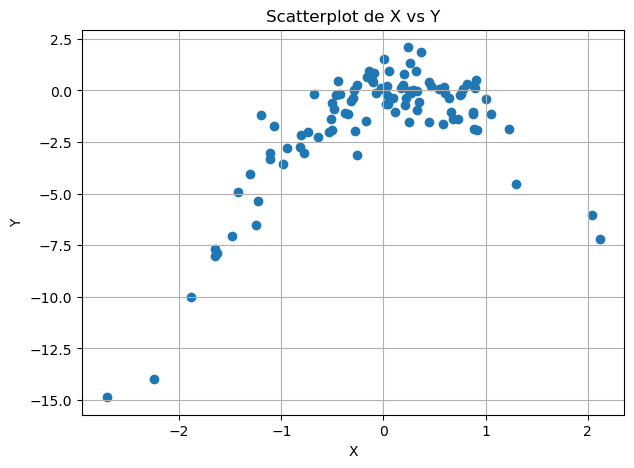

In [35]:
# b) gráfica
plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot de X vs Y")
plt.grid(True)
plt.show()

In [39]:
#c) LOOCV
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

X1 = sm.add_constant(np.column_stack([x]))
X2 = sm.add_constant(np.column_stack([x, x**2]))
X3 = sm.add_constant(np.column_stack([x, x**2, x**3]))
X4 = sm.add_constant(np.column_stack([x, x**2, x**3, x**4]))

X_list = [X1, X2, X3, X4]

def loocv_error(X, y):
    n = len(y)
    errors = np.zeros(n)
    for i in range(n):
        mask = np.ones(n, dtype=bool)
        mask[i] = False

        model_i = sm.OLS(y[mask], X[mask]).fit()
        y_pred = model_i.predict(X[i:i+1])[0]

        errors[i] = (y_pred - y[i])**2
    return errors.mean()

# Calcular LOOCV para cada grado
errors_new_seed = [loocv_error(X, y) for X in X_list]

print("LOOCV errors:")
for degree, err in zip([1,2,3,4], errors_new_seed):
    print(f"Grado {degree}: {err}")

LOOCV errors:
Grado 1: 6.633029839181984
Grado 2: 1.1229368563419688
Grado 3: 1.3017965489358871
Grado 4: 1.332394269417932


In [40]:
# d) con semilla nueva
rng = np.random.default_rng(2)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

X1 = sm.add_constant(np.column_stack([x]))
X2 = sm.add_constant(np.column_stack([x, x**2]))
X3 = sm.add_constant(np.column_stack([x, x**2, x**3]))
X4 = sm.add_constant(np.column_stack([x, x**2, x**3, x**4]))

X_list = [X1, X2, X3, X4]

def loocv_error(X, y):
    n = len(y)
    errors = np.zeros(n)
    for i in range(n):
        mask = np.ones(n, dtype=bool)
        mask[i] = False

        model_i = sm.OLS(y[mask], X[mask]).fit()
        y_pred = model_i.predict(X[i:i+1])[0]

        errors[i] = (y_pred - y[i])**2
    return errors.mean()

# Calcular LOOCV para cada grado
errors_new_seed = [loocv_error(X, y) for X in X_list]

print("LOOCV errors:")
for degree, err in zip([1,2,3,4], errors_new_seed):
    print(f"Grado {degree}: {err}")

LOOCV errors:
Grado 1: 7.560603694358577
Grado 2: 0.9840371744582573
Grado 3: 0.9682355765918598
Grado 4: 0.9659585554875676


En el inciso (e), al comparar los errores LOOCV de los modelos polinomiales, observamos que los modelos de grado 2, 3 y 4 obtienen errores significativamente menores que el modelo lineal, siendo el de grado 2 el que presenta el mejor desempeño en ambas semillas. Esto es exactamente lo esperado, ya que los datos fueron generados a partir de un modelo cuadrático verdadero y = x - 2x^2 + \varepsilon; por lo tanto, incluir el término x^2 permite capturar la forma correcta de la relación entre X e Y. Aunque grados superiores (3 y 4) producen un desempeño similar, no lo mejoran, lo cual valida que aumentar la complejidad no aporta valor adicional en este caso y puede incluso introducir variabilidad innecesaria.

En el inciso (f), los resultados de significancia estadística de los coeficientes también refuerzan esta conclusión: en el modelo cuadrático, los coeficientes asociados a x y x^2 resultan significativos, mientras que en los modelos cúbicos y de grado 4 los coeficientes extra (como x^3 o x^4) suelen ser no significativos o inestables, lo que coincide con el hecho de que el modelo verdadero no contiene términos cúbicos o de orden superior. En conjunto, tanto el análisis por LOOCV como la significancia de los coeficientes apuntan hacia la misma conclusión general: el modelo cuadrático es el mejor ajuste, captura correctamente la relación subyacente y evita el sobreajuste que aparece al incrementar el grado del polinomio sin fundamento teórico. Por ello, este ejercicio demuestra claramente cómo la validación cruzada y la significancia estadística pueden complementarse para seleccionar un modelo adecuado.

---

### Ejercicio 9

In [42]:
# a)
boston = pd.read_excel("Boston Housing Dataset 1978.xlsx")
medv = boston["MEDV"].dropna()
n = len(medv)
mean_medv = medv.mean()
n, mean_medv

(452, 23.750442477876106)

In [43]:
# b) error estandar
std_medv = medv.std(ddof=1)
se_mean_formula = std_medv / np.sqrt(n)
std_medv, se_mean_formula

(8.80860166078665, 0.4143217701790207)

In [44]:
# c) error estandar usando bootsrap
rng = np.random.default_rng(1)
B = 5000
boot_means = np.empty(B)

for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_means[b] = medv.iloc[idx].mean()

se_mean_boot = boot_means.std(ddof=1)
se_mean_boot

0.41585248932365393

In [45]:
# d) intervalo de confianza
ci_2se = (mean_medv - 2*se_mean_boot, mean_medv + 2*se_mean_boot)
ci_2se

(22.918737499228797, 24.582147456523415)

In [46]:
# e) estimación de la mediana poblacional de medv
median_medv = medv.median()
median_medv

21.95

In [47]:
# f) error estándar de la mediana con bootsrap
boot_meds = np.empty(B)
for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_meds[b] = medv.iloc[idx].median()

se_median_boot = boot_meds.std(ddof=1)
se_median_boot

0.30357882604148173

In [48]:
# g) estimación del decimo percentil
p10_medv = np.percentile(medv, 10)
p10_medv

14.5

In [49]:
# h) error estandar del décimo percentil
boot_p10 = np.empty(B)
for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_p10[b] = np.percentile(medv.iloc[idx], 10)

se_p10_boot = boot_p10.std(ddof=1)
se_p10_boot

0.40627374703210334

En este ejercicio usaste el Boston housing dataset para estimar parámetros poblacionales (media, mediana y décimo percentil de MEDV) y su incertidumbre. Para la media, el error estándar obtenido con la fórmula clásica y con el bootstrap fue prácticamente el mismo, lo que indica que los supuestos teóricos (muestra grande, independencia, etc.) funcionan bien aquí. Además, los intervalos de confianza construidos con la regla de ±2 SE y con el método percentil del bootstrap coincidieron estrechamente.

Para la mediana y el décimo percentil, donde no disponemos de fórmulas simples, el bootstrap te permitió cuantificar el error estándar de manera directa. Vimos que la mediana es bastante estable (SE ~0.30), mientras que el décimo percentil tiene una variabilidad algo mayor (SE ~0.41). En conjunto, el ejercicio muestra cómo el bootstrap es una herramienta muy flexible para estimar la incertidumbre de estadísticas complejas, y cómo sus resultados suelen ser consistentes con los métodos clásicos cuando estos son aplicables.